# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Raka Admiharfan Fatihah
- **Email:** m002d4ky2495@bangkit.academy
- **ID Dicoding:** raka_af

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah terdapat pola perilaku peminjaman sepeda berdasarkan hari libur atau hari kerja dan apakah jam tertentu mempengaruhi penyewaan sepeda?

- Pertanyaan 2 : Bagaimana distribusi peminjam antara pengguna terdaftar dan pengguna non-terdaftar?

## Import Semua Packages/Library yang Digunakan

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [64]:
hour_df = pd.read_csv('data/hour.csv')  
hour_df.head(20) 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [65]:
day_df = pd.read_csv('data/day.csv')
day_df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


### Assessing Data

#### Menilai data hour

In [66]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [67]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [68]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [69]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada keanehan, seperti missing value, inacurate value, dan data terduplikasi pada data hour.csv. Namun tipedata pada kolom `dteday` perlu diubah menjadi datetime.

#### Menilai data day.csv

In [70]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [71]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [72]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [73]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada keanehan, seperti missing value, inacurate value, dan data terduplikasi pada data day.csv. Namun tipe data pada kolom `dteday` perlu diubah menjadi datetime

### Cleaning Data

In [74]:
# Membersihakan data day_df
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [75]:
# Membersihakan data day_df
day_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

#### Pertanyaan 1:

In [76]:
# Buat 2 dataframe yang membedakan antara hari kerja dan hari libur
working_day = day_df[day_df['workingday'] == 1]
non_working_day = day_df[day_df['workingday'] == 0]

print("Jumlah penyewaan sepeda pada hari kerja: ", working_day.shape[0])
print("Jumlah penyewaan sepeda pada hari libur: ", non_working_day.shape[0])

Jumlah penyewaan sepeda pada hari kerja:  500
Jumlah penyewaan sepeda pada hari libur:  231


In [77]:
# Menghitung jumlah peminjaman sepeda per jam pada hari kerja dan hari libur
hourly_rental_wd = hour_df[hour_df['workingday'] == 1].groupby('hr').agg({'cnt': 'mean'})
hourly_rental_nwd = hour_df[hour_df['workingday'] == 0].groupby('hr').agg({'cnt': 'mean'})

print("Penyewaan sepeda rata-rata per jam pada hari kerja: ")
print(hourly_rental_wd)
print("")
print("Penyewaan sepeda rata-rata per jam pada hari libur: ")
print(hourly_rental_nwd)

Penyewaan sepeda rata-rata per jam pada hari kerja: 
           cnt
hr            
0    36.786290
1    16.552632
2     8.683778
3     4.942553
4     5.429787
5    24.913131
6   102.500000
7   290.612903
8   477.006048
9   241.518145
10  135.366935
11  158.229839
12  200.820926
13  198.429719
14  183.572289
15  201.331325
16  293.122244
17  525.290581
18  492.226908
19  348.401606
20  249.718876
21  186.287149
22  138.389558
23   88.708835

Penyewaan sepeda rata-rata per jam pada hari libur: 
           cnt
hr            
0    90.800000
1    69.508696
2    53.171053
3    25.775330
4     8.264317
5     8.689189
6    18.742358
7    43.406926
8   105.653680
9   171.623377
10  255.909091
11  315.316017
12  366.259740
13  372.731602
14  364.645022
15  358.813853
16  352.727273
17  323.549784
18  281.056522
19  231.673913
20  174.739130
21  142.060870
22  116.060870
23   85.930435


#### Pertanyaan 2:

In [78]:
# Mengambil data jumlah peminjam terdaftar dan non-terdaftar
registered_users = day_df['registered']
casual_users = day_df['casual']

print("Jumlah peminjam terdaftar: ", registered_users.sum())
print("Jumlah peminjam non-terdaftar: ", casual_users.sum())

Jumlah peminjam terdaftar:  2672662
Jumlah peminjam non-terdaftar:  620017


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

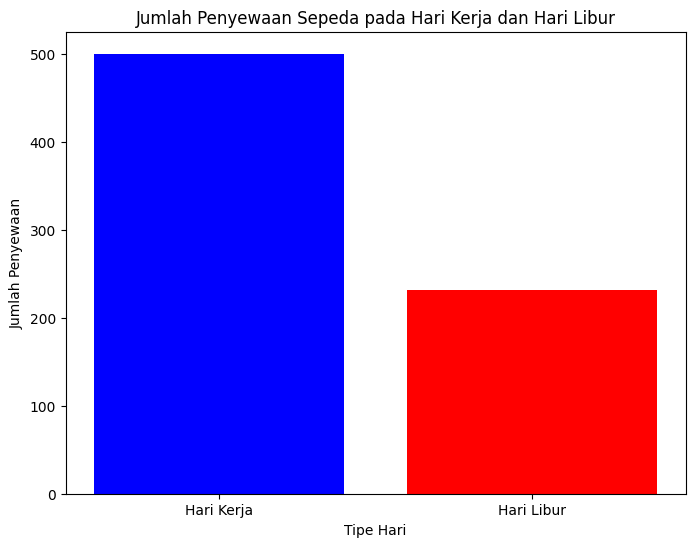

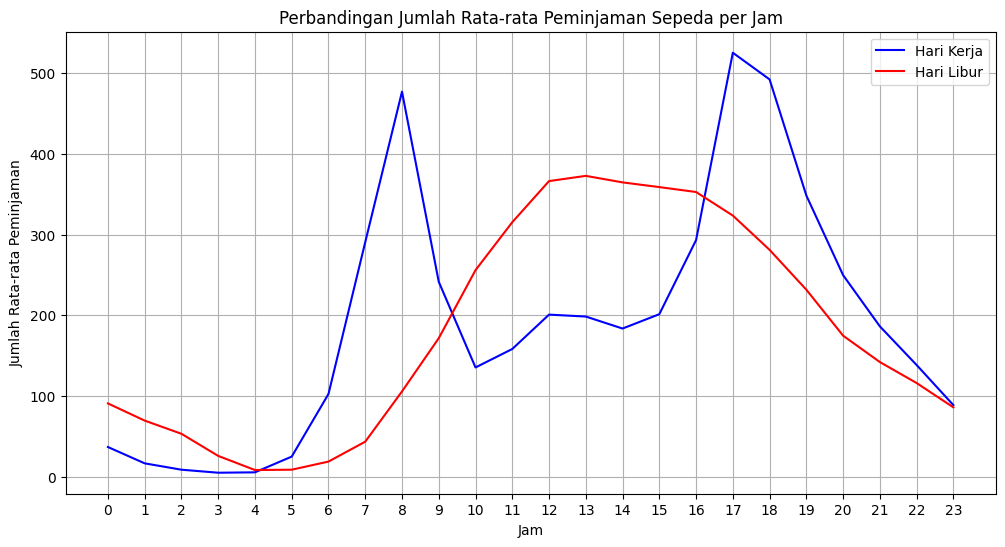

In [79]:
# Mendefinisikan data
categories = ['Hari Kerja', 'Hari Libur']
rentals_count = [working_day.shape[0], non_working_day.shape[0]]

# Visualisasi dengan bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, rentals_count, color=['blue', 'red'])
plt.title('Jumlah Penyewaan Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(hourly_rental_wd, label='Hari Kerja', color='blue')
plt.plot(hourly_rental_nwd, label='Hari Libur', color='red')
plt.title('Perbandingan Jumlah Rata-rata Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Rata-rata Peminjaman')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2:

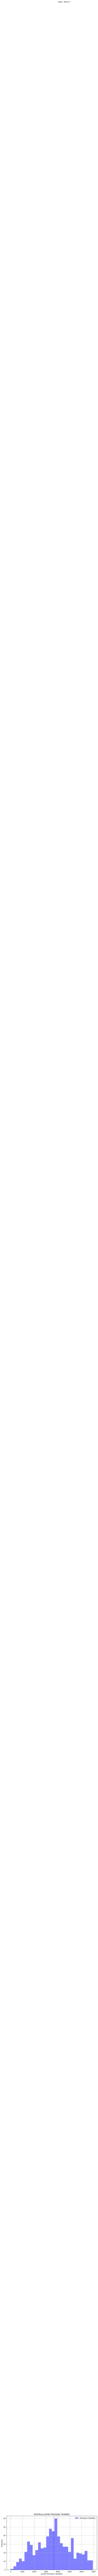

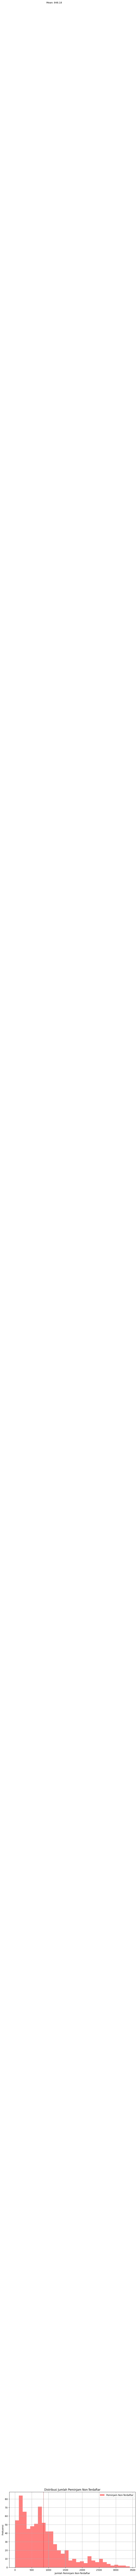

In [80]:
# Membuat histogram untuk distribusi peminjam terdaftar
plt.figure(figsize=(10, 6))
plt.hist(registered_users, bins=30, color='blue', alpha=0.5, label='Peminjam Terdaftar')
plt.axvline(registered_users.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.text(registered_users.mean() + registered_users.mean() / 10, 3000, 'Mean: {:.2f}'.format(registered_users.mean()))
plt.title('Distribusi Jumlah Peminjam Terdaftar')
plt.xlabel('Jumlah Peminjam Terdaftar')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.show()

# Membuat histogram untuk distribusi peminjam non-terdaftar
plt.figure(figsize=(10, 6))
plt.hist(casual_users, bins=30, color='red', alpha=0.5, label='Peminjam Non-Terdaftar')
plt.axvline(casual_users.mean(), color='red', linestyle='dashed', linewidth=1)
plt.text(casual_users.mean() + casual_users.mean() / 10, 3000, 'Mean: {:.2f}'.format(casual_users.mean()))
plt.title('Distribusi Jumlah Peminjam Non-Terdaftar')
plt.xlabel('Jumlah Peminjam Non-Terdaftar')
plt.ylabel('Frekuensi')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2